In [7]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [2]:
df_s = pd.read_csv('../data/swatches_data.csv')

In [19]:
df_p = pd.read_csv('../data/products_data.csv')

In [11]:
url = df_s.img_url[1]

In [12]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

#### Extract SKU
- SKU is unique per swatch
- It can be found in the img url

In [16]:
df_s['sku'] = df_s.img_url.str.extract('\/sku\/(s\d+)')

/Users/josephinetirtanata/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


#### Count Swatches

In [23]:
swatch_counts = pd.DataFrame(df_s.groupby('product_id', as_index=True).size())

In [25]:
swatch_counts.columns = ['swatch_count']

In [29]:
df_p = df_p.join(swatch_counts, on='product_id')

In [30]:
df_p.loc[df_p.swatch_count.isnull(), 'swatch_count'] = 0

#### Fetching swatch colors 

##### Face Makeup
- This category would be the most straightforward.
- The other categories doesn't have the color as the entire image.

###### Helper Functions

In [198]:
from IPython.core.display import display, HTML
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
def display_color(rgb):
    rgb = [int(color) for color in rgb]
    print (rgb)
    hex_code = rgb_to_hex(tuple(rgb))
    display(HTML('<div style="width:140px; height:140px; background-color: {};"></div>'.format(hex_code)))

In [199]:
### to decipher the color: minus the common colors from the other swatch

In [46]:
p_ids = df_p[(df_p.categories.str.contains('makeup;face')) & (df_p.swatch_count > 1)].product_id.values

In [200]:
def mean_color(img):
    c = np.mean(img.reshape(img.shape[0] * img.shape[1], 3), axis=0)
    return c

In [243]:
def fetch_color(url):
    print('fetching {}'.format(url))
    response = requests.get(url)
    if not response :
        return None
    img = Image.open(BytesIO(response.content))
    display(img)
    images = split_images(np.array(img), 240)
    colors = []
    for im in images:
        if np.mean(im) > 250:
            print('not a solid swatch color')
            return None
        c = mean_color(im)
        colors.append(c)
        display_color(c)
    return colors

In [248]:
len(p_ids)

236

fetching http://www.sephora.com/productimages/sku/s1642016+sw.jpg


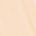

[248, 222, 198]


fetching http://www.sephora.com/productimages/sku/s1576859+sw.jpg


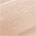

[222, 193, 175]


fetching http://www.sephora.com/productimages/sku/s1576842+sw.jpg


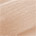

[212, 181, 159]


fetching http://www.sephora.com/productimages/sku/s1642024+sw.jpg


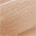

[201, 163, 136]


fetching http://www.sephora.com/productimages/sku/s1788645+sw.jpg


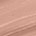

[206, 157, 140]


fetching http://www.sephora.com/productimages/sku/s1908508+sw.jpg


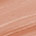

[210, 154, 131]


fetching http://www.sephora.com/productimages/sku/s1908516+sw.jpg


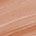

[203, 150, 124]


fetching http://www.sephora.com/productimages/sku/s1788652+sw.jpg


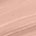

[224, 178, 162]


fetching http://www.sephora.com/productimages/sku/s1788660+sw.jpg


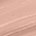

[219, 173, 157]


fetching http://www.sephora.com/productimages/sku/s1788678+sw.jpg


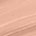

[229, 177, 155]


fetching http://www.sephora.com/productimages/sku/s1788686+sw.jpg


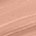

[218, 163, 142]


fetching http://www.sephora.com/productimages/sku/s1908524+sw.jpg


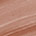

[183, 133, 115]


fetching http://www.sephora.com/productimages/sku/s1908532+sw.jpg


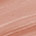

[205, 151, 135]


fetching http://www.sephora.com/productimages/sku/s1788694+sw.jpg


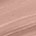

[199, 155, 142]


fetching http://www.sephora.com/productimages/sku/s1788702+sw.jpg


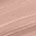

[207, 165, 151]


fetching http://www.sephora.com/productimages/sku/s1788710+sw.jpg


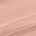

[221, 172, 157]


fetching http://www.sephora.com/productimages/sku/s1788736+sw.jpg


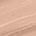

[218, 176, 154]


fetching http://www.sephora.com/productimages/sku/s1788728+sw.jpg


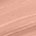

[224, 167, 148]


fetching http://www.sephora.com/productimages/sku/s1788744+sw.jpg


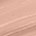

[220, 173, 155]


fetching http://www.sephora.com/productimages/sku/s1788751+sw.jpg


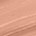

[219, 159, 135]


fetching http://www.sephora.com/productimages/sku/s1908540+sw.jpg


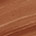

[154, 90, 59]


fetching http://www.sephora.com/productimages/sku/s1908557+sw.jpg


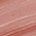

[193, 133, 123]


fetching http://www.sephora.com/productimages/sku/s1908565+sw.jpg


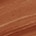

[154, 85, 53]


fetching http://www.sephora.com/productimages/sku/s1788769+sw.jpg


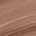

[160, 115, 96]


fetching http://www.sephora.com/productimages/sku/s1908573+sw.jpg


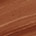

[142, 77, 49]


fetching http://www.sephora.com/productimages/sku/s1788777+sw.jpg


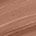

[168, 117, 96]


fetching http://www.sephora.com/productimages/sku/s1788785+sw.jpg


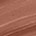

[159, 100, 82]


fetching http://www.sephora.com/productimages/sku/s1788793+sw.jpg


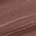

[123, 82, 76]


fetching http://www.sephora.com/productimages/sku/s1667005+sw.jpg


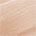

[221, 189, 167]


fetching http://www.sephora.com/productimages/sku/s1667013+sw.jpg


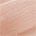

[215, 174, 157]


fetching http://www.sephora.com/productimages/sku/s1667021+sw.jpg


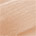

[218, 180, 153]


fetching http://www.sephora.com/productimages/sku/s1667039+sw.jpg


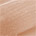

[206, 163, 138]


fetching http://www.sephora.com/productimages/sku/s1667047+sw.jpg


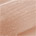

[202, 162, 142]


fetching http://www.sephora.com/productimages/sku/s1667054+sw.jpg


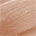

[197, 153, 128]


fetching http://www.sephora.com/productimages/sku/s1667062+sw.jpg


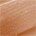

[193, 136, 101]


fetching http://www.sephora.com/productimages/sku/s1667070+sw.jpg


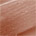

[175, 121, 101]


fetching http://www.sephora.com/productimages/sku/s1814482+sw.jpg


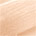

[243, 206, 178]


fetching http://www.sephora.com/productimages/sku/s1814490+sw.jpg


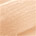

[236, 195, 162]


fetching http://www.sephora.com/productimages/sku/s1814508+sw.jpg


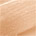

[229, 183, 147]


fetching http://www.sephora.com/productimages/sku/s1814516+sw.jpg


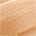

[224, 175, 131]


fetching http://www.sephora.com/productimages/sku/s1814524+sw.jpg


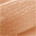

[205, 149, 112]


fetching http://www.sephora.com/productimages/sku/s1814532+sw.jpg


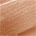

[195, 140, 107]


fetching http://www.sephora.com/productimages/sku/s1465194+sw.jpg


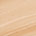

[229, 192, 157]


fetching http://www.sephora.com/productimages/sku/s1465186+sw.jpg


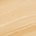

[232, 198, 153]


fetching http://www.sephora.com/productimages/sku/s1465301+sw.jpg


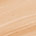

[230, 191, 155]


fetching http://www.sephora.com/productimages/sku/s1465293+sw.jpg


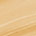

[229, 193, 140]


fetching http://www.sephora.com/productimages/sku/s1465277+sw.jpg


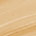

[223, 188, 140]


fetching http://www.sephora.com/productimages/sku/s1465368+sw.jpg


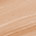

[217, 175, 144]


fetching http://www.sephora.com/productimages/sku/s1465327+sw.jpg


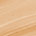

[227, 185, 142]


fetching http://www.sephora.com/productimages/sku/s1465152+sw.jpg


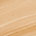

[225, 184, 140]


fetching http://www.sephora.com/productimages/sku/s1465160+sw.jpg


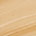

[222, 186, 139]


fetching http://www.sephora.com/productimages/sku/s1465178+sw.jpg


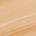

[224, 183, 141]


fetching http://www.sephora.com/productimages/sku/s1465285+sw.jpg


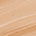

[221, 178, 142]


fetching http://www.sephora.com/productimages/sku/s1465350+sw.jpg


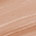

[206, 163, 139]


fetching http://www.sephora.com/productimages/sku/s1465335+sw.jpg


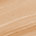

[217, 177, 140]


fetching http://www.sephora.com/productimages/sku/s1465269+sw.jpg


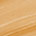

[221, 172, 112]


fetching http://www.sephora.com/productimages/sku/s1469782+sw.jpg


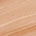

[216, 169, 135]


fetching http://www.sephora.com/productimages/sku/s1465145+sw.jpg


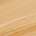

[219, 178, 127]


fetching http://www.sephora.com/productimages/sku/s1465251+sw.jpg


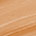

[215, 159, 112]


fetching http://www.sephora.com/productimages/sku/s1465343+sw.jpg


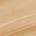

[212, 175, 133]


fetching http://www.sephora.com/productimages/sku/s1465137+sw.jpg


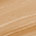

[206, 165, 122]


fetching http://www.sephora.com/productimages/sku/s1465129+sw.jpg


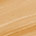

[219, 173, 119]


fetching http://www.sephora.com/productimages/sku/s1465111+sw.jpg


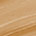

[201, 158, 109]


fetching http://www.sephora.com/productimages/sku/s1465236+sw.jpg


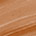

[188, 127, 85]


fetching http://www.sephora.com/productimages/sku/s1465103+sw.jpg


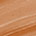

[198, 136, 92]


fetching http://www.sephora.com/productimages/sku/s1465244+sw.jpg


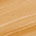

[216, 166, 106]


fetching http://www.sephora.com/productimages/sku/s1465202+sw.jpg


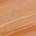

[204, 143, 99]


fetching http://www.sephora.com/productimages/sku/s1465319+sw.jpg


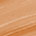

[214, 154, 106]


fetching http://www.sephora.com/productimages/sku/s1465087+sw.jpg


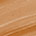

[198, 141, 92]


fetching http://www.sephora.com/productimages/sku/s1465228+sw.jpg


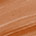

[188, 121, 80]


fetching http://www.sephora.com/productimages/sku/s1778521+sw.jpg


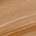

[182, 135, 94]


fetching http://www.sephora.com/productimages/sku/s1778539+sw.jpg


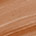

[183, 127, 91]


fetching http://www.sephora.com/productimages/sku/s1778547+sw.jpg


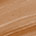

[184, 134, 94]


fetching http://www.sephora.com/productimages/sku/s1778554+sw.jpg


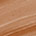

[183, 129, 93]


fetching http://www.sephora.com/productimages/sku/s1778562+sw.jpg


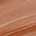

[180, 118, 89]


fetching http://www.sephora.com/productimages/sku/s1778570+sw.jpg


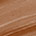

[164, 112, 79]


fetching http://www.sephora.com/productimages/sku/s1778588+sw.jpg


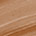

[179, 131, 96]


fetching http://www.sephora.com/productimages/sku/s1778596+sw.jpg


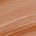

[187, 130, 97]


fetching http://www.sephora.com/productimages/sku/s1073980+sw.jpg


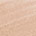

[222, 188, 165]


fetching http://www.sephora.com/productimages/sku/s1073998+sw.jpg


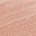

[214, 167, 149]


fetching http://www.sephora.com/productimages/sku/s1395375+sw.jpg


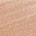

[212, 169, 144]


fetching http://www.sephora.com/productimages/sku/s1395383+sw.jpg


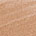

[202, 156, 125]


fetching http://www.sephora.com/productimages/sku/s1395391+sw.jpg


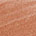

[196, 131, 101]


fetching http://www.sephora.com/productimages/sku/s1777697+sw.jpg


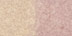

[214, 185, 169]


fetching http://www.sephora.com/productimages/sku/s1774991+sw.jpg


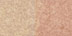

[210, 173, 147]


fetching http://www.sephora.com/productimages/sku/s1778414+sw.jpg


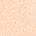

[251, 218, 192]


fetching http://www.sephora.com/productimages/sku/s1778422+sw.jpg


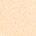

[253, 226, 196]


fetching http://www.sephora.com/productimages/sku/s1778430+sw.jpg


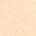

[252, 224, 193]


fetching http://www.sephora.com/productimages/sku/s1778448+sw.jpg


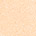

[253, 221, 189]


fetching http://www.sephora.com/productimages/sku/s1778463+sw.jpg


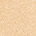

[240, 207, 167]


fetching http://www.sephora.com/productimages/sku/s1778455+sw.jpg


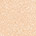

[244, 211, 182]


fetching http://www.sephora.com/productimages/sku/s1778471+sw.jpg


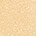

[244, 213, 166]


fetching http://www.sephora.com/productimages/sku/s1465624+sw.jpg


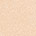

[243, 213, 187]


fetching http://www.sephora.com/productimages/sku/s1465665+sw.jpg


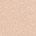

[229, 198, 177]


fetching http://www.sephora.com/productimages/sku/s1465574+sw.jpg


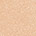

[234, 195, 163]


fetching http://www.sephora.com/productimages/sku/s1465632+sw.jpg


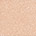

[233, 195, 170]


fetching http://www.sephora.com/productimages/sku/s1763549+sw.jpg


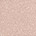

[218, 188, 177]


fetching http://www.sephora.com/productimages/sku/s1763556+sw.jpg


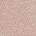

[203, 173, 163]


fetching http://www.sephora.com/productimages/sku/s1763564+sw.jpg


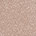

[194, 166, 152]


fetching http://www.sephora.com/productimages/sku/s1778489+sw.jpg


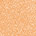

[244, 186, 135]


fetching http://www.sephora.com/productimages/sku/s1778497+sw.jpg


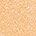

[244, 198, 148]


fetching http://www.sephora.com/productimages/sku/s1778505+sw.jpg


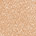

[223, 181, 147]


fetching http://www.sephora.com/productimages/sku/s1778513+sw.jpg


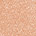

[228, 177, 147]


fetching http://www.sephora.com/productimages/sku/s1465640+sw.jpg


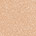

[226, 185, 154]


fetching http://www.sephora.com/productimages/sku/s1465616+sw.jpg


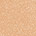

[229, 182, 143]


fetching http://www.sephora.com/productimages/sku/s1465657+sw.jpg


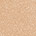

[222, 183, 149]


fetching http://www.sephora.com/productimages/sku/s1465558+sw.jpg


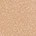

[216, 175, 142]


fetching http://www.sephora.com/productimages/sku/s1465590+sw.jpg


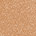

[208, 155, 114]


fetching http://www.sephora.com/productimages/sku/s1465608+sw.jpg


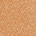

[212, 153, 105]


fetching http://www.sephora.com/productimages/sku/s1579093+sw.jpg


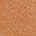

[196, 129, 85]


fetching http://www.sephora.com/productimages/sku/s1465566+sw.jpg


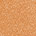

[220, 151, 96]


fetching http://www.sephora.com/productimages/sku/s1659499+sw.jpg


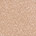

[211, 175, 150]


fetching http://www.sephora.com/productimages/sku/s1659507+sw.jpg


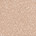

[213, 182, 161]


fetching http://www.sephora.com/productimages/sku/s1659515+sw.jpg


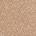

[193, 158, 131]


fetching http://www.sephora.com/productimages/sku/s1659523+sw.jpg


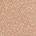

[205, 165, 139]


fetching http://www.sephora.com/productimages/sku/s1776129+sw.jpg


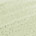

[210, 215, 185]


fetching http://www.sephora.com/productimages/sku/s1776111+sw.jpg


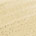

[228, 211, 172]


fetching http://www.sephora.com/productimages/sku/s1776137+sw.jpg


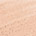

[239, 200, 176]


fetching http://www.sephora.com/productimages/sku/s1775964+sw.jpg


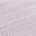

[211, 197, 207]


fetching http://www.sephora.com/productimages/sku/s1775972+sw.jpg


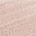

[219, 193, 182]


fetching http://www.sephora.com/productimages/sku/s1904119+sw.jpg


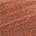

[161, 93, 70]


fetching http://www.sephora.com/productimages/sku/s1919281+sw.jpg


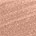

[208, 157, 136]


fetching http://www.sephora.com/productimages/sku/s1713395+sw.jpg


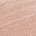

[214, 174, 159]


fetching http://www.sephora.com/productimages/sku/s1713403+sw.jpg


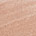

[211, 169, 148]


fetching http://www.sephora.com/productimages/sku/s1713411+sw.jpg


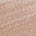

[196, 164, 148]


fetching http://www.sephora.com/productimages/sku/s1919299+sw.jpg


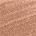

[194, 140, 115]


fetching http://www.sephora.com/productimages/sku/s1712397+sw.jpg


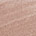

[193, 157, 143]


fetching http://www.sephora.com/productimages/sku/s1919307+sw.jpg


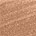

[191, 140, 109]


fetching http://www.sephora.com/productimages/sku/s1713429+sw.jpg


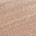

[195, 163, 142]


fetching http://www.sephora.com/productimages/sku/s1713437+sw.jpg


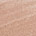

[206, 166, 146]


fetching http://www.sephora.com/productimages/sku/s1919315+sw.jpg


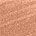

[211, 146, 116]


fetching http://www.sephora.com/productimages/sku/s1712405+sw.jpg


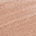

[206, 162, 140]


fetching http://www.sephora.com/productimages/sku/s1712413+sw.jpg


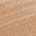

[199, 157, 124]


fetching http://www.sephora.com/productimages/sku/s1712421+sw.jpg


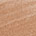

[196, 149, 118]


fetching http://www.sephora.com/productimages/sku/s1712439+sw.jpg


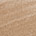

[189, 156, 125]


fetching http://www.sephora.com/productimages/sku/s1712447+sw.jpg


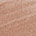

[191, 147, 126]


fetching http://www.sephora.com/productimages/sku/s1712454+sw.jpg


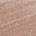

[184, 149, 135]


fetching http://www.sephora.com/productimages/sku/s1712462+sw.jpg


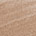

[187, 154, 130]


fetching http://www.sephora.com/productimages/sku/s1712470+sw.jpg


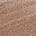

[167, 130, 111]


fetching http://www.sephora.com/productimages/sku/s1712488+sw.jpg


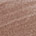

[159, 123, 109]


fetching http://www.sephora.com/productimages/sku/s1712496+sw.jpg


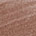

[156, 115, 100]


fetching http://www.sephora.com/productimages/sku/s1712504+sw.jpg


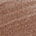

[150, 110, 92]


fetching http://www.sephora.com/productimages/sku/s1712512+sw.jpg


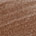

[138, 99, 77]


fetching http://www.sephora.com/productimages/sku/s1712546+sw.jpg


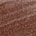

[121, 79, 67]


fetching http://www.sephora.com/productimages/sku/s1712553+sw.jpg


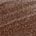

[109, 76, 61]


fetching http://www.sephora.com/productimages/sku/s1919323+sw.jpg


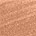

[209, 146, 113]


fetching http://www.sephora.com/productimages/sku/s1919331+sw.jpg


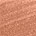

[206, 135, 107]


fetching http://www.sephora.com/productimages/sku/s1919349+sw.jpg


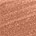

[194, 127, 100]


fetching http://www.sephora.com/productimages/sku/s1919356+sw.jpg


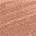

[198, 138, 114]


fetching http://www.sephora.com/productimages/sku/s1919364+sw.jpg


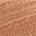

[190, 129, 93]


fetching http://www.sephora.com/productimages/sku/s1919372+sw.jpg


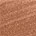

[177, 116, 87]


fetching http://www.sephora.com/productimages/sku/s1576255+sw.jpg


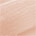

[227, 191, 173]


fetching http://www.sephora.com/productimages/sku/s1576263+sw.jpg


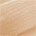

[217, 182, 149]


fetching http://www.sephora.com/productimages/sku/s1576271+sw.jpg


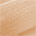

[218, 178, 142]


fetching http://www.sephora.com/productimages/sku/s1576289+sw.jpg


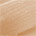

[210, 172, 137]


fetching http://www.sephora.com/productimages/sku/s1576297+sw.jpg


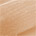

[212, 170, 134]


fetching http://www.sephora.com/productimages/sku/s1576305+sw.jpg


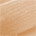

[215, 173, 134]


fetching http://www.sephora.com/productimages/sku/s1576313+sw.jpg


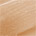

[210, 168, 130]


fetching http://www.sephora.com/productimages/sku/s1576321+sw.jpg


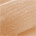

[207, 163, 127]


fetching http://www.sephora.com/productimages/sku/s1576339+sw.jpg


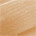

[211, 169, 125]


fetching http://www.sephora.com/productimages/sku/s1576347+sw.jpg


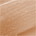

[201, 157, 124]


fetching http://www.sephora.com/productimages/sku/s1576354+sw.jpg


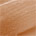

[190, 136, 97]


fetching http://www.sephora.com/productimages/sku/s1576362+sw.jpg


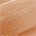

[202, 147, 109]


fetching http://www.sephora.com/productimages/sku/s1576370+sw.jpg


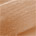

[189, 141, 105]


fetching http://www.sephora.com/productimages/sku/s1576388+sw.jpg


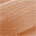

[196, 141, 106]


fetching http://www.sephora.com/productimages/sku/s1576396+sw.jpg


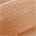

[193, 140, 103]


fetching http://www.sephora.com/productimages/sku/s1576404+sw.jpg


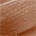

[158, 105, 75]


fetching http://www.sephora.com/productimages/sku/s1576412+sw.jpg


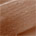

[147, 100, 74]


fetching http://www.sephora.com/productimages/sku/s1576420+sw.jpg


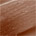

[144, 94, 70]


fetching http://www.sephora.com/productimages/sku/s1576438+sw.jpg


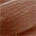

[126, 77, 55]


fetching http://www.sephora.com/productimages/sku/s1576446+sw.jpg


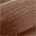

[119, 78, 61]


fetching http://www.sephora.com/productimages/sku/s1263425+sw.jpg


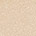

[227, 204, 179]


fetching http://www.sephora.com/productimages/sku/s1153394+sw.jpg


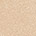

[225, 197, 169]


fetching http://www.sephora.com/productimages/sku/s1153410+sw.jpg


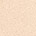

[245, 220, 196]


fetching http://www.sephora.com/productimages/sku/s1153436+sw.jpg


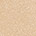

[225, 195, 163]


fetching http://www.sephora.com/productimages/sku/s1153402+sw.jpg


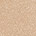

[214, 182, 153]


fetching http://www.sephora.com/productimages/sku/s1153444+sw.jpg


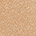

[211, 170, 133]


fetching http://www.sephora.com/productimages/sku/s1263391+sw.jpg


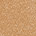

[201, 154, 108]


fetching http://www.sephora.com/productimages/sku/s1263417+sw.jpg


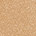

[210, 168, 125]


fetching http://www.sephora.com/productimages/sku/s1311836+sw.jpg


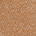

[181, 133, 95]


fetching http://www.sephora.com/productimages/sku/s1287481+sw.jpg


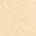

[247, 222, 187]


fetching http://www.sephora.com/productimages/sku/s1287523+sw.jpg


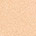

[246, 206, 171]


fetching http://www.sephora.com/productimages/sku/s1287499+sw.jpg


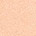

[250, 206, 177]


fetching http://www.sephora.com/productimages/sku/s1287531+sw.jpg


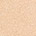

[239, 205, 174]


fetching http://www.sephora.com/productimages/sku/s1856285+sw.jpg


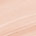

[240, 206, 190]


fetching http://www.sephora.com/productimages/sku/s1856293+sw.jpg


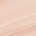

[236, 204, 189]


fetching http://www.sephora.com/productimages/sku/s1856301+sw.jpg


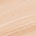

[234, 201, 176]


fetching http://www.sephora.com/productimages/sku/s1856319+sw.jpg


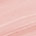

[236, 194, 187]


fetching http://www.sephora.com/productimages/sku/s1856327+sw.jpg


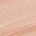

[224, 184, 164]


fetching http://www.sephora.com/productimages/sku/s1856335+sw.jpg


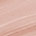

[219, 179, 168]


fetching http://www.sephora.com/productimages/sku/s1856343+sw.jpg


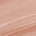

[209, 164, 146]


fetching http://www.sephora.com/productimages/sku/s1856350+sw.jpg


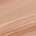

[205, 159, 134]


fetching http://www.sephora.com/productimages/sku/s1856376+sw.jpg


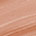

[208, 152, 128]


fetching http://www.sephora.com/productimages/sku/s1856368+sw.jpg


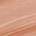

[208, 154, 130]


fetching http://www.sephora.com/productimages/sku/s1856384+sw.jpg


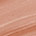

[206, 148, 127]


fetching http://www.sephora.com/productimages/sku/s1856392+sw.jpg


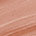

[203, 145, 125]


fetching http://www.sephora.com/productimages/sku/s1856400+sw.jpg


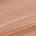

[199, 149, 124]


fetching http://www.sephora.com/productimages/sku/s1856418+sw.jpg


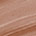

[179, 132, 112]


fetching http://www.sephora.com/productimages/sku/s1856426+sw.jpg


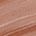

[180, 128, 110]


fetching http://www.sephora.com/productimages/sku/s1856434+sw.jpg


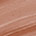

[185, 131, 110]


fetching http://www.sephora.com/productimages/sku/s1856442+sw.jpg


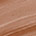

[176, 125, 100]


fetching http://www.sephora.com/productimages/sku/s1856459+sw.jpg


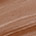

[160, 114, 90]


fetching http://www.sephora.com/productimages/sku/s1856467+sw.jpg


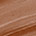

[161, 108, 80]


fetching http://www.sephora.com/productimages/sku/s1856475+sw.jpg


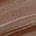

[128, 96, 81]


fetching http://www.sephora.com/productimages/sku/s1061191+sw.jpg


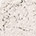

[228, 219, 213]


fetching http://www.sephora.com/productimages/sku/s51532+sw.jpg


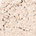

[232, 214, 199]


fetching http://www.sephora.com/productimages/sku/s51474+sw.jpg


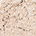

[223, 201, 184]


fetching http://www.sephora.com/productimages/sku/s51516+sw.jpg


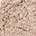

[199, 171, 154]


fetching http://www.sephora.com/productimages/sku/s1487388+sw-62.jpg


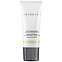

not a solid swatch color
fetching http://www.sephora.com/productimages/sku/s1561240+sw-62.jpg


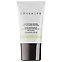

not a solid swatch color
fetching http://www.sephora.com/productimages/sku/s1847391+sw.jpg


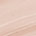

[227, 199, 186]


fetching http://www.sephora.com/productimages/sku/s1847409+sw.jpg


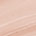

[229, 195, 180]


fetching http://www.sephora.com/productimages/sku/s1847417+sw.jpg


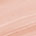

[234, 193, 178]


fetching http://www.sephora.com/productimages/sku/s1847425+sw.jpg


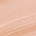

[231, 187, 166]


fetching http://www.sephora.com/productimages/sku/s1847433+sw.jpg


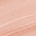

[232, 185, 169]


fetching http://www.sephora.com/productimages/sku/s1847441+sw.jpg


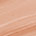

[221, 170, 144]


fetching http://www.sephora.com/productimages/sku/s1847458+sw.jpg


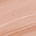

[218, 173, 154]


fetching http://www.sephora.com/productimages/sku/s1847466+sw.jpg


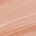

[219, 169, 147]


fetching http://www.sephora.com/productimages/sku/s1847474+sw.jpg


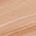

[211, 167, 137]


fetching http://www.sephora.com/productimages/sku/s1847482+sw.jpg


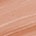

[211, 155, 131]


fetching http://www.sephora.com/productimages/sku/s1847490+sw.jpg


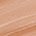

[211, 160, 131]


fetching http://www.sephora.com/productimages/sku/s1847508+sw.jpg


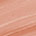

[218, 157, 136]


fetching http://www.sephora.com/productimages/sku/s1847516+sw.jpg


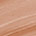

[203, 152, 126]


fetching http://www.sephora.com/productimages/sku/s1847524+sw.jpg


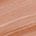

[200, 145, 121]


fetching http://www.sephora.com/productimages/sku/s1847532+sw.jpg


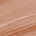

[195, 144, 119]


fetching http://www.sephora.com/productimages/sku/s1847680+sw.jpg


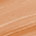

[216, 157, 116]


fetching http://www.sephora.com/productimages/sku/s1847540+sw.jpg


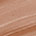

[187, 138, 113]


fetching http://www.sephora.com/productimages/sku/s1847557+sw.jpg


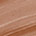

[178, 128, 102]


fetching http://www.sephora.com/productimages/sku/s1847565+sw.jpg


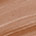

[179, 130, 104]


fetching http://www.sephora.com/productimages/sku/s1847573+sw.jpg


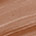

[171, 121, 96]


fetching http://www.sephora.com/productimages/sku/s1847797+sw.jpg


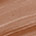

[171, 121, 96]


fetching http://www.sephora.com/productimages/sku/s1847581+sw.jpg


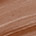

[160, 112, 88]


fetching http://www.sephora.com/productimages/sku/s1847599+sw.jpg


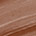

[154, 107, 86]


fetching http://www.sephora.com/productimages/sku/s1847607+sw.jpg


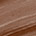

[139, 97, 76]


fetching http://www.sephora.com/productimages/sku/s747832+sw.jpg


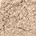

[202, 174, 150]


fetching http://www.sephora.com/productimages/sku/s1922541+sw.jpg


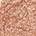

[202, 148, 124]


fetching http://www.sephora.com/productimages/sku/s747436+sw.jpg


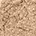

[197, 161, 129]


fetching http://www.sephora.com/productimages/sku/s1228998+sw.jpg


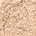

[223, 187, 158]


fetching http://www.sephora.com/productimages/sku/s1229004+sw.jpg


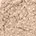

[209, 179, 155]


fetching http://www.sephora.com/productimages/sku/s1922558+sw.jpg


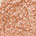

[210, 153, 125]


fetching http://www.sephora.com/productimages/sku/s1922566+sw.jpg


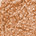

[202, 145, 105]


fetching http://www.sephora.com/productimages/sku/s747428+sw.jpg


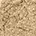

[193, 164, 124]


fetching http://www.sephora.com/productimages/sku/s1922574+sw.jpg


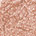

[209, 160, 141]


fetching http://www.sephora.com/productimages/sku/s747469+sw.jpg


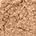

[196, 148, 112]


fetching http://www.sephora.com/productimages/sku/s1922582+sw.jpg


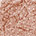

[198, 151, 133]


fetching http://www.sephora.com/productimages/sku/s747410+sw.jpg


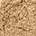

[190, 152, 107]


fetching http://www.sephora.com/productimages/sku/s1922590+sw.jpg


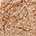

[190, 145, 114]


fetching http://www.sephora.com/productimages/sku/s1072891+sw.jpg


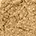

[193, 152, 98]


fetching http://www.sephora.com/productimages/sku/s1922608+sw.jpg


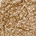

[175, 140, 102]


fetching http://www.sephora.com/productimages/sku/s1922616+sw.jpg


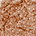

[182, 128, 96]


fetching http://www.sephora.com/productimages/sku/s1922509+sw.jpg


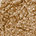

[168, 130, 88]


fetching http://www.sephora.com/productimages/sku/s747840+sw.jpg


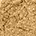

[194, 152, 94]


fetching http://www.sephora.com/productimages/sku/s747873+sw.jpg


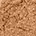

[188, 131, 88]


fetching http://www.sephora.com/productimages/sku/s1229012+sw.jpg


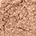

[196, 147, 117]


fetching http://www.sephora.com/productimages/sku/s1922517+sw.jpg


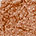

[182, 118, 81]


fetching http://www.sephora.com/productimages/sku/s862235+sw.jpg


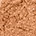

[204, 135, 91]


fetching http://www.sephora.com/productimages/sku/s1072909+sw.jpg


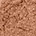

[179, 120, 90]


fetching http://www.sephora.com/productimages/sku/s1922525+sw.jpg


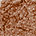

[156, 103, 73]


fetching http://www.sephora.com/productimages/sku/s1072917+sw.jpg


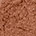

[160, 95, 67]


fetching http://www.sephora.com/productimages/sku/s1229020+sw.jpg


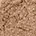

[173, 132, 102]


fetching http://www.sephora.com/productimages/sku/s1229038+sw.jpg


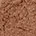

[151, 98, 72]


fetching http://www.sephora.com/productimages/sku/s1073055+sw.jpg


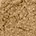

[172, 134, 87]


fetching http://www.sephora.com/productimages/sku/s1922533+sw.jpg


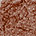

[144, 91, 71]


fetching http://www.sephora.com/productimages/sku/s862250+sw.jpg


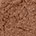

[143, 94, 69]


fetching http://www.sephora.com/productimages/sku/s1701101+sw.jpg


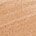

[216, 166, 128]


fetching http://www.sephora.com/productimages/sku/s1701119+sw.jpg


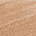

[203, 159, 126]


fetching http://www.sephora.com/productimages/sku/s1701127+sw.jpg


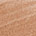

[198, 148, 116]


fetching http://www.sephora.com/productimages/sku/s1701135+sw.jpg


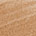

[196, 150, 111]


fetching http://www.sephora.com/productimages/sku/s1701143+sw.jpg


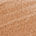

[198, 145, 107]


fetching http://www.sephora.com/productimages/sku/s1701150+sw.jpg


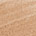

[208, 165, 131]


fetching http://www.sephora.com/productimages/sku/s1701168+sw.jpg


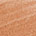

[209, 146, 108]


fetching http://www.sephora.com/productimages/sku/s1701176+sw.jpg


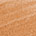

[212, 150, 100]


fetching http://www.sephora.com/productimages/sku/s1701184+sw.jpg


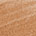

[197, 143, 103]


fetching http://www.sephora.com/productimages/sku/s1701192+sw.jpg


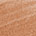

[199, 141, 106]


fetching http://www.sephora.com/productimages/sku/s1701200+sw.jpg


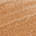

[197, 142, 97]


fetching http://www.sephora.com/productimages/sku/s1701218+sw.jpg


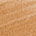

[206, 150, 100]


fetching http://www.sephora.com/productimages/sku/s1701226+sw.jpg


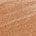

[195, 138, 100]


fetching http://www.sephora.com/productimages/sku/s1701085+sw.jpg


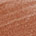

[173, 109, 83]


fetching http://www.sephora.com/productimages/sku/s1701093+sw.jpg


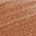

[174, 114, 83]


fetching http://www.sephora.com/productimages/sku/s1701267+sw.jpg


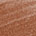

[164, 106, 80]


fetching http://www.sephora.com/productimages/sku/s1701275+sw.jpg


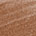

[162, 114, 85]


fetching http://www.sephora.com/productimages/sku/s1701283+sw.jpg


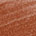

[163, 91, 63]


fetching http://www.sephora.com/productimages/sku/s1701234+sw.jpg


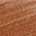

[162, 99, 64]


fetching http://www.sephora.com/productimages/sku/s1701242+sw.jpg


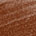

[130, 74, 47]


fetching http://www.sephora.com/productimages/sku/s1701259+sw.jpg


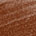

[130, 74, 47]


fetching http://www.sephora.com/productimages/sku/s1889963+sw.jpg


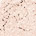

[238, 216, 204]


fetching http://www.sephora.com/productimages/sku/s1889971+sw.jpg


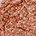

[180, 114, 89]


fetching http://www.sephora.com/productimages/sku/s870618+sw.jpg


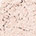

[236, 215, 205]


fetching http://www.sephora.com/productimages/sku/s1926435+sw.jpg


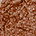

[146, 85, 56]


fetching http://www.sephora.com/productimages/sku/s1635176+sw.jpg


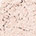

[236, 215, 205]


fetching http://www.sephora.com/productimages/sku/s1762608+sw.jpg


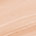

[236, 198, 175]


fetching http://www.sephora.com/productimages/sku/s1762616+sw.jpg


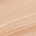

[224, 187, 160]


fetching http://www.sephora.com/productimages/sku/s1711910+sw.jpg


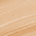

[225, 186, 148]


fetching http://www.sephora.com/productimages/sku/s1711928+sw.jpg


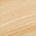

[226, 195, 153]


fetching http://www.sephora.com/productimages/sku/s1711936+sw.jpg


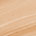

[225, 185, 148]


fetching http://www.sephora.com/productimages/sku/s1711944+sw.jpg


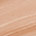

[216, 172, 144]


fetching http://www.sephora.com/productimages/sku/s1711951+sw.jpg


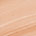

[231, 185, 155]


fetching http://www.sephora.com/productimages/sku/s1711969+sw.jpg


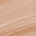

[210, 170, 144]


fetching http://www.sephora.com/productimages/sku/s1711977+sw.jpg


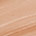

[215, 169, 139]


fetching http://www.sephora.com/productimages/sku/s1711985+sw.jpg


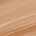

[201, 155, 119]


fetching http://www.sephora.com/productimages/sku/s1711993+sw.jpg


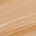

[211, 169, 128]


fetching http://www.sephora.com/productimages/sku/s1712009+sw.jpg


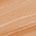

[213, 161, 121]


fetching http://www.sephora.com/productimages/sku/s1712017+sw.jpg


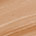

[202, 156, 119]


fetching http://www.sephora.com/productimages/sku/s1712025+sw.jpg


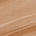

[192, 147, 111]


fetching http://www.sephora.com/productimages/sku/s1762624+sw.jpg


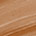

[182, 130, 90]


fetching http://www.sephora.com/productimages/sku/s1762632+sw.jpg


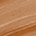

[184, 128, 85]


fetching http://www.sephora.com/productimages/sku/s1762640+sw.jpg


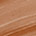

[180, 124, 89]


fetching http://www.sephora.com/productimages/sku/s1762657+sw.jpg


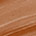

[174, 114, 76]


fetching http://www.sephora.com/productimages/sku/s1877000+sw.jpg


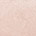

[232, 207, 197]


fetching http://www.sephora.com/productimages/sku/s1877018+sw.jpg


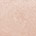

[227, 197, 183]


fetching http://www.sephora.com/productimages/sku/s1877026+sw.jpg


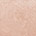

[224, 188, 172]


fetching http://www.sephora.com/productimages/sku/s1877034+sw.jpg


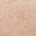

[215, 180, 159]


fetching http://www.sephora.com/productimages/sku/s1877042+sw.jpg


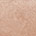

[208, 170, 149]


fetching http://www.sephora.com/productimages/sku/s1720879+sw.jpg


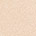

[239, 214, 193]


fetching http://www.sephora.com/productimages/sku/s1452424+sw.jpg


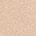

[225, 195, 172]


fetching http://www.sephora.com/productimages/sku/s1452416+sw.jpg


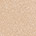

[221, 191, 165]


fetching http://www.sephora.com/productimages/sku/s1465707+sw.jpg


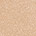

[221, 186, 155]


fetching http://www.sephora.com/productimages/sku/s1452408+sw.jpg


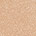

[219, 180, 149]


fetching http://www.sephora.com/productimages/sku/s1465699+sw.jpg


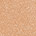

[220, 170, 133]


fetching http://www.sephora.com/productimages/sku/s1452390+sw.jpg


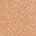

[215, 162, 124]


fetching http://www.sephora.com/productimages/sku/s1452382+sw.jpg


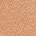

[212, 156, 119]


fetching http://www.sephora.com/productimages/sku/s1452374+sw.jpg


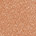

[205, 144, 109]


fetching http://www.sephora.com/productimages/sku/s1452366+sw.jpg


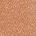

[201, 139, 104]


fetching http://www.sephora.com/productimages/sku/s1452358+sw.jpg


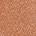

[192, 127, 95]


fetching http://www.sephora.com/productimages/sku/s1720838+sw.jpg


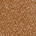

[160, 110, 69]


fetching http://www.sephora.com/productimages/sku/s1452341+sw.jpg


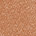

[193, 132, 96]


fetching http://www.sephora.com/productimages/sku/s1456391+sw.jpg


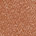

[178, 114, 84]


fetching http://www.sephora.com/productimages/sku/s1452333+sw.jpg


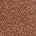

[143, 91, 70]


fetching http://www.sephora.com/productimages/sku/s1720820+sw.jpg


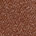

[126, 75, 57]


fetching http://www.sephora.com/productimages/sku/s1720861+sw.jpg


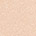

[239, 208, 186]


fetching http://www.sephora.com/productimages/sku/s1452325+sw.jpg


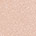

[230, 197, 181]


fetching http://www.sephora.com/productimages/sku/s1452317+sw.jpg


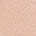

[226, 190, 171]


fetching http://www.sephora.com/productimages/sku/s1452309+sw.jpg


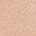

[222, 183, 160]


fetching http://www.sephora.com/productimages/sku/s1452291+sw.jpg


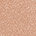

[211, 164, 139]


fetching http://www.sephora.com/productimages/sku/s1720846+sw.jpg


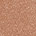

[187, 134, 108]


fetching http://www.sephora.com/productimages/sku/s1720812+sw.jpg


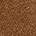

[124, 78, 45]


fetching http://www.sephora.com/productimages/sku/s1720804+sw.jpg


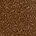

[102, 63, 33]


fetching http://www.sephora.com/productimages/sku/s1720796+sw.jpg


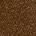

[91, 58, 28]


fetching http://www.sephora.com/productimages/sku/s1720788+sw.jpg


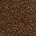

[81, 54, 33]


fetching http://www.sephora.com/productimages/sku/s1452283+sw.jpg


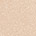

[230, 204, 181]


fetching http://www.sephora.com/productimages/sku/s1452275+sw.jpg


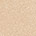

[226, 198, 170]


fetching http://www.sephora.com/productimages/sku/s1452267+sw.jpg


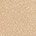

[218, 188, 154]


fetching http://www.sephora.com/productimages/sku/s1720747+sw.jpg


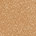

[200, 152, 105]


fetching http://www.sephora.com/productimages/sku/s1452259+sw.jpg


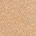

[214, 173, 135]


fetching http://www.sephora.com/productimages/sku/s1720739+sw.jpg


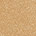

[206, 166, 117]


fetching http://www.sephora.com/productimages/sku/s1452242+sw.jpg


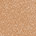

[204, 157, 118]


fetching http://www.sephora.com/productimages/sku/s1720721+sw.jpg


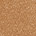

[185, 133, 88]


fetching http://www.sephora.com/productimages/sku/s1452234+sw.jpg


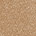

[185, 148, 112]


fetching http://www.sephora.com/productimages/sku/s1456417+sw.jpg


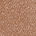

[173, 127, 102]


fetching http://www.sephora.com/productimages/sku/s1720853+sw.jpg


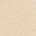

[230, 210, 186]


fetching http://www.sephora.com/productimages/sku/s1720770+sw.jpg


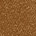

[138, 90, 44]


fetching http://www.sephora.com/productimages/sku/s1720762+sw.jpg


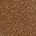

[126, 86, 55]


fetching http://www.sephora.com/productimages/sku/s1720754+sw.jpg


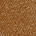

[145, 96, 51]


fetching http://www.sephora.com/productimages/sku/s740712+sw.jpg


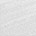

[223, 223, 223]


fetching http://www.sephora.com/productimages/sku/s1462654+sw.jpg


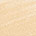

[242, 216, 179]


fetching http://www.sephora.com/productimages/sku/s825802+sw.jpg


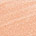

[243, 190, 161]


fetching http://www.sephora.com/productimages/sku/s825794+sw.jpg


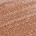

[181, 129, 104]


fetching http://www.sephora.com/productimages/sku/s1626456+sw.jpg


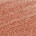

[191, 124, 102]


fetching http://www.sephora.com/productimages/sku/s1830850+sw.jpg


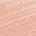

[233, 185, 167]


fetching http://www.sephora.com/productimages/sku/s1901867+sw.jpg


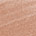

[203, 154, 132]


fetching http://www.sephora.com/productimages/sku/s1621887+sw.jpg


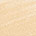

[242, 216, 179]


fetching http://www.sephora.com/productimages/sku/s1621879+sw.jpg


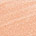

[243, 190, 161]


fetching http://www.sephora.com/productimages/sku/s889543+sw.jpg


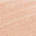

[232, 191, 168]


fetching http://www.sephora.com/productimages/sku/s889550+sw.jpg


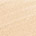

[241, 214, 184]


fetching http://www.sephora.com/productimages/sku/s889568+sw.jpg


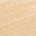

[235, 203, 166]


fetching http://www.sephora.com/productimages/sku/s889576+sw.jpg


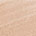

[222, 188, 165]


fetching http://www.sephora.com/productimages/sku/s889584+sw.jpg


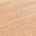

[224, 182, 149]


fetching http://www.sephora.com/productimages/sku/s889592+sw.jpg


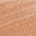

[208, 152, 118]


fetching http://www.sephora.com/productimages/sku/s1755156+sw.jpg


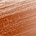

[189, 120, 86]


fetching http://www.sephora.com/productimages/sku/s1822204+sw.jpg


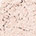

[236, 215, 205]


fetching http://www.sephora.com/productimages/sku/s1887884+sw.jpg


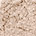

[210, 184, 165]


fetching http://www.sephora.com/productimages/sku/s1919042+sw.jpg


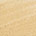

[229, 199, 150]


fetching http://www.sephora.com/productimages/sku/s1919059+sw.jpg


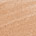

[216, 169, 135]


fetching http://www.sephora.com/productimages/sku/s1919034+sw.jpg


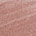

[186, 137, 129]


fetching http://www.sephora.com/productimages/sku/s1919232+sw.jpg


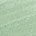

[172, 199, 169]


fetching http://www.sephora.com/productimages/sku/s1919224+sw.jpg


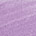

[188, 154, 196]


fetching http://www.sephora.com/productimages/sku/s1911353+sw.jpg


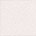

[242, 234, 232]


fetching http://www.sephora.com/productimages/sku/s1911361+sw.jpg


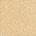

[228, 198, 154]


fetching http://www.sephora.com/productimages/sku/s1911379+sw.jpg


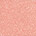

[239, 170, 155]


fetching http://www.sephora.com/productimages/sku/s1834886+sw-62.jpg


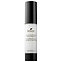

not a solid swatch color
fetching http://www.sephora.com/productimages/sku/s1785922+sw-62.jpg


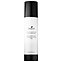

not a solid swatch color
fetching http://www.sephora.com/productimages/sku/s1699594+sw.jpg


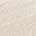

[225, 214, 202]


fetching http://www.sephora.com/productimages/sku/s1699602+sw.jpg


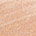

[227, 185, 159]


fetching http://www.sephora.com/productimages/sku/s1699610+sw.jpg


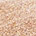

[219, 184, 160]


fetching http://www.sephora.com/productimages/sku/s1699628+sw.jpg


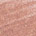

[204, 150, 136]


fetching http://www.sephora.com/productimages/sku/s1699636+sw.jpg


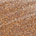

[169, 127, 98]


fetching http://www.sephora.com/productimages/sku/s1830868+sw.jpg


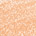

[246, 198, 163]


fetching http://www.sephora.com/productimages/sku/s1901883+sw.jpg


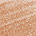

[211, 165, 134]


fetching http://www.sephora.com/productimages/sku/s1840339+sw.jpg


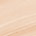

[238, 209, 185]


fetching http://www.sephora.com/productimages/sku/s1840347+sw.jpg


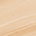

[233, 201, 168]


fetching http://www.sephora.com/productimages/sku/s1840354+sw.jpg


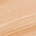

[229, 187, 150]


fetching http://www.sephora.com/productimages/sku/s1840362+sw.jpg


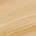

[217, 184, 137]


fetching http://www.sephora.com/productimages/sku/s1840370+sw.jpg


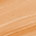

[228, 170, 119]


fetching http://www.sephora.com/productimages/sku/s1840388+sw.jpg


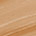

[202, 156, 113]


fetching http://www.sephora.com/productimages/sku/s1840396+sw.jpg


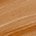

[184, 128, 76]


fetching http://www.sephora.com/productimages/sku/s1840404+sw.jpg


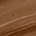

[127, 83, 50]


fetching http://www.sephora.com/productimages/sku/s1008721+sw.jpg


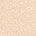

[242, 216, 192]


fetching http://www.sephora.com/productimages/sku/s1008739+sw.jpg


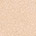

[237, 207, 182]


fetching http://www.sephora.com/productimages/sku/s51573+sw.jpg


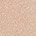

[218, 186, 165]


fetching http://www.sephora.com/productimages/sku/s51722+sw.jpg


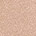

[214, 178, 158]


fetching http://www.sephora.com/productimages/sku/s51730+sw.jpg


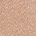

[205, 165, 141]


fetching http://www.sephora.com/productimages/sku/s51789+sw.jpg


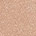

[209, 168, 145]


fetching http://www.sephora.com/productimages/sku/s1008747+sw.jpg


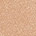

[216, 172, 140]


fetching http://www.sephora.com/productimages/sku/s51748+sw.jpg


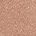

[193, 146, 123]


fetching http://www.sephora.com/productimages/sku/s51755+sw.jpg


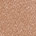

[191, 144, 117]


fetching http://www.sephora.com/productimages/sku/s51763+sw.jpg


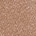

[177, 136, 113]


fetching http://www.sephora.com/productimages/sku/s1008762+sw.jpg


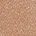

[190, 145, 117]


fetching http://www.sephora.com/productimages/sku/s1008754+sw.jpg


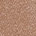

[174, 133, 111]


fetching http://www.sephora.com/productimages/sku/s51771+sw.jpg


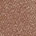

[154, 112, 94]


fetching http://www.sephora.com/productimages/sku/s1490374+sw.jpg


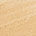

[231, 195, 148]


fetching http://www.sephora.com/productimages/sku/s1490366+sw.jpg


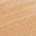

[217, 172, 129]


fetching http://www.sephora.com/productimages/sku/s1490358+sw.jpg


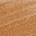

[189, 132, 84]


fetching http://www.sephora.com/productimages/sku/s1677913+sw.jpg


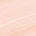

[249, 218, 205]


fetching http://www.sephora.com/productimages/sku/s1677921+sw.jpg


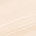

[246, 229, 213]


fetching http://www.sephora.com/productimages/sku/s1677905+sw.jpg


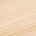

[239, 212, 182]


fetching http://www.sephora.com/productimages/sku/s1677939+sw.jpg


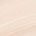

[241, 222, 207]


fetching http://www.sephora.com/productimages/sku/s1677947+sw.jpg


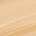

[233, 197, 154]


fetching http://www.sephora.com/productimages/sku/s1677988+sw.jpg


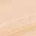

[240, 207, 180]


fetching http://www.sephora.com/productimages/sku/s1677954+sw.jpg


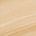

[226, 195, 158]


fetching http://www.sephora.com/productimages/sku/s1677962+sw.jpg


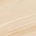

[231, 210, 183]


fetching http://www.sephora.com/productimages/sku/s1677970+sw.jpg


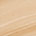

[224, 192, 156]


fetching http://www.sephora.com/productimages/sku/s1677996+sw.jpg


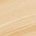

[231, 201, 161]


fetching http://www.sephora.com/productimages/sku/s1678002+sw.jpg


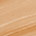

[216, 169, 125]


fetching http://www.sephora.com/productimages/sku/s1678010+sw.jpg


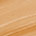

[217, 166, 112]


fetching http://www.sephora.com/productimages/sku/s1678028+sw.jpg


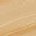

[215, 179, 131]


fetching http://www.sephora.com/productimages/sku/s1678036+sw.jpg


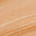

[219, 169, 125]


fetching http://www.sephora.com/productimages/sku/s1678044+sw.jpg


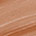

[190, 133, 102]


fetching http://www.sephora.com/productimages/sku/s1678051+sw.jpg


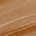

[172, 122, 82]


fetching http://www.sephora.com/productimages/sku/s1678069+sw.jpg


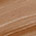

[167, 123, 90]


fetching http://www.sephora.com/productimages/sku/s1678077+sw.jpg


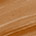

[176, 119, 70]


fetching http://www.sephora.com/productimages/sku/s1678085+sw.jpg


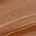

[159, 106, 73]


fetching http://www.sephora.com/productimages/sku/s1678093+sw.jpg


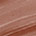

[163, 109, 93]


In [247]:
start = 200
end = 300
df_s.loc[df_s.product_id.isin(p_ids[start:end]), 'color'] = df_s[df_s.product_id.isin(p_ids[start:end])].img_url.apply(fetch_color)

In [234]:
img_urls = ['http://www.sephora.com/productimages/sku/s1411636+sw.jpg']

In [238]:
problem_ids = df_s[df_s.img_url.isin(img_urls)].product_id.values

In [ ]:
df_s

In [241]:
df_p[df_p.product_id.isin(problem_ids)].keywords.values

array(['cocoa-contour-kit-P393805',
       'photo-finish-oil-free-foundation-primer-pore-minimizing-P387425',
       'contour-cream-kit-P401511'], dtype=object)

In [219]:
img = np.array(img)

In [220]:
img.shape

(36, 72, 3)

In [224]:
np.mean(img[:, 33])

202.47222222222223

In [194]:
np.mean(img.reshape(img.shape[0] * img.shape[1], 3), axis=0)

array([ 142.51003086,  108.35108025,  101.44135802])

In [214]:
def split_images(img, white = 250):
    images = []
    prev = 0
    bound = False
    for i in range(img.shape[1]):
        mean = np.mean(img[:, i])
        if mean > white and not bound:
            images.append(img[:, prev:i+1])
            bound = True
        elif mean < white and bound:
            bound = False
            prev = i
    if not bound:
        images.append(img[:, prev:])
    return images
        
            
        

In [210]:
display_color([250, 255, 245])

[250, 255, 245]


In [252]:
df_s.to_csv('../data/swatches_data.csv', index=False)